In [1]:
import pandas as pd 
import pickle 
import numpy as np 
from sqlalchemy import create_engine
import datetime 

import folium 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Load Dataset

In [2]:
df = pd.read_pickle('final_clean.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72641 entries, 0 to 186097
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   camis                  72641 non-null  int64         
 1   dba                    72641 non-null  object        
 2   boro                   72641 non-null  object        
 3   building               72511 non-null  object        
 4   street                 72641 non-null  object        
 5   zipcode                72641 non-null  object        
 6   inspection_date        72641 non-null  datetime64[ns]
 7   critical_flag          72641 non-null  object        
 8   record_date            72641 non-null  object        
 9   latitude               72641 non-null  float64       
 10  longitude              72641 non-null  float64       
 11  cuisine_description    72641 non-null  object        
 12  action                 72641 non-null  object        
 13  

Load preprocessed cleaned dataset into SQLite Database Table 

In [4]:
#Create SQLite Database Table 
engine = create_engine('sqlite:////Users/hannahkim/project/project3/inspection.db')
connection = engine.connect()

df.to_sql('inspection', con = engine, index = False, if_exists = 'replace')

72641

Load database table into pandas

In [5]:
df = pd.read_sql('SELECT * FROM inspection', connection)
df.head()

,camis,dba,boro,building,street,zipcode,inspection_date,critical_flag,record_date,latitude,longitude,cuisine_description,action,violation_code,violation_description,score,inspection_type,grade,grade_date,address
0,50045746,SILVER RICE,Brooklyn,575A,FLATBUSH AVENUE,11225.0,2017-08-25 00:00:00.000000,Critical,2022-08-27T06:00:12.000,40.659624,-73.960558,Japanese,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,24.0,Cycle Inspection / Initial Inspection,Missing Grade,None,575A FLATBUSH AVENUE NYC
1,50013830,CAPRI IV DELI,Bronx,2073,BARTOW AVENUE,10475.0,2022-05-09 00:00:00.000000,Critical,2022-08-27T06:00:12.000,40.869519,-73.827871,Latin American,Establishment Closed by DOHMH. Violations were...,02B,Hot food item not held at or above 140º F.,77.0,Cycle Inspection / Initial Inspection,Missing Grade,None,2073 BARTOW AVENUE NYC
2,41230004,WICKED WILLY'S,Manhattan,149,BLEECKER STREET,10012.0,2019-08-14 00:00:00.000000,Critical,2022-08-27T06:00:12.000,40.728269,-73.999358,American,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,7.0,Cycle Inspection / Re-inspection,A,2019-08-14T00:00:00.000,149 BLEECKER STREET NYC
3,50093599,SAPPORO,Brooklyn,7812,3 AVENUE,11209.0,2019-09-30 00:00:00.000000,Critical,2022-08-27T06:00:12.000,40.629118,-74.028756,Japanese,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,9.0,Pre-permit (Operational) / Re-inspection,A,2019-09-30T00:00:00.000,7812 3 AVENUE NYC
4,41310201,DUNKIN,Bronx,4147,THROGS NECK EXPRESSWAY,10465.0,2022-03-17 00:00:00.000000,Critical,2022-08-27T06:00:12.000,40.819955,-73.810445,Donuts,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",34.0,Cycle Inspection / Initial Inspection,Missing Grade,None,4147 THROGS NECK EXPRESSWAY NYC


In [6]:
df.shape

(72641, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72641 entries, 0 to 72640
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  72641 non-null  int64  
 1   dba                    72641 non-null  object 
 2   boro                   72641 non-null  object 
 3   building               72511 non-null  object 
 4   street                 72641 non-null  object 
 5   zipcode                72641 non-null  object 
 6   inspection_date        72641 non-null  object 
 7   critical_flag          72641 non-null  object 
 8   record_date            72641 non-null  object 
 9   latitude               72641 non-null  float64
 10  longitude              72641 non-null  float64
 11  cuisine_description    72641 non-null  object 
 12  action                 72641 non-null  object 
 13  violation_code         71345 non-null  object 
 14  violation_description  71345 non-null  object 
 15  sc

SQL Query for data analysis

In [8]:
map_df = pd.read_sql('''SELECT inspection_date, camis, dba, 
                        latitude, longitude, address, cuisine_description,
                        grade, sum(score) as score
                        FROM inspection
                        GROUP BY  inspection_date, camis, dba, latitude, longitude 
                        ORDER BY sum(score) DESC;''',connection)
map_df.head()

,inspection_date,camis,dba,latitude,longitude,address,cuisine_description,grade,score
0,2016-08-10 00:00:00.000000,41640556,COVE LOUNGE,40.808647,-73.944857,325 LENOX AVENUE NYC,American,Missing Grade,104.0
1,2016-08-31 00:00:00.000000,41477524,AMERICAN LEGION VETERANS POST,40.813978,-73.946547,248 WEST 132 STREET NYC,American,B,104.0
2,2016-10-24 00:00:00.000000,50055077,PUBLIQUE ESPRESSO,40.807610,-73.958910,420 WEST 118 STREET NYC,American,A,104.0
3,2017-01-21 00:00:00.000000,41640556,COVE LOUNGE,40.808647,-73.944857,325 LENOX AVENUE NYC,American,A,104.0
4,2017-01-25 00:00:00.000000,41639573,CORNER SOCIAL,40.808540,-73.944937,321 LENOX AVENUE NYC,American,Missing Grade,104.0


In [9]:
map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72641 entries, 0 to 72640
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   inspection_date      72641 non-null  object 
 1   camis                72641 non-null  int64  
 2   dba                  72641 non-null  object 
 3   latitude             72641 non-null  float64
 4   longitude            72641 non-null  float64
 5   address              72641 non-null  object 
 6   cuisine_description  72641 non-null  object 
 7   grade                72641 non-null  object 
 8   score                72641 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 5.0+ MB


In [10]:
map_df['inspection_date'] = pd.to_datetime(map_df['inspection_date'])
map_df['inspection_date'] = map_df['inspection_date'].dt.year

In [11]:
map_df.head()

,inspection_date,camis,dba,latitude,longitude,address,cuisine_description,grade,score
0,2016,41640556,COVE LOUNGE,40.808647,-73.944857,325 LENOX AVENUE NYC,American,Missing Grade,104.0
1,2016,41477524,AMERICAN LEGION VETERANS POST,40.813978,-73.946547,248 WEST 132 STREET NYC,American,B,104.0
2,2016,50055077,PUBLIQUE ESPRESSO,40.807610,-73.958910,420 WEST 118 STREET NYC,American,A,104.0
3,2017,41640556,COVE LOUNGE,40.808647,-73.944857,325 LENOX AVENUE NYC,American,A,104.0
4,2017,41639573,CORNER SOCIAL,40.808540,-73.944937,321 LENOX AVENUE NYC,American,Missing Grade,104.0


In [12]:
map_df.inspection_date.value_counts()

2019    28021
2022    18620
2020     7729
2021     7462
2018     6548
2017     3521
2016      724
2015       16
Name: inspection_date, dtype: int64

In [13]:
map_df.shape

(72641, 9)

In [14]:
#check for duplicates on given datetime

(map_df.groupby(['inspection_date','camis', 'dba', 'cuisine_description', 'grade'])
 .score.count().reset_index().sort_values('score', ascending = False))

,inspection_date,camis,dba,cuisine_description,grade,score
4695,2018,41187577,HANSOL NUTRITION CENTER,Korean,Missing Grade,7
27596,2019,50072346,GUANTANAMERA,Spanish,Missing Grade,6
20142,2019,50005981,AROMA DE CAFE BAKERY,Latin American,Missing Grade,5
30388,2019,50086726,LA CASA DE JULIA,Mexican,Missing Grade,5
64368,2022,50113399,YEMENI HOUSE RESTAURANT & BAKERY,Middle Eastern,Missing Grade,5
...,...,...,...,...,...,...
24305,2019,50051745,ORCHARD BEACH SNACK BAR SECTION 5,Coffee/Tea,Missing Grade,1
24306,2019,50051746,PENG'S NOODLE FOLK,Asian/Asian Fusion,A,1
24307,2019,50051746,PENG'S NOODLE FOLK,Asian/Asian Fusion,Missing Grade,1
24308,2019,50051756,KUNG FU TEA,Coffee/Tea,A,1


In [15]:
mask = ((map_df['camis'] ==41187577) &
       (map_df['dba'] =="HANSOL NUTRITION CENTER") &
       (map_df['inspection_date'] == 2018) &
       (map_df['cuisine_description'] =="Korean") & 
        (map_df['grade'] =="Missing Grade")
       
)
map_df[mask]

,inspection_date,camis,dba,latitude,longitude,address,cuisine_description,grade,score
10450,2018,41187577,HANSOL NUTRITION CENTER,40.762775,-73.805229,160-26 NORTHERN BOULEVARD NYC,Korean,Missing Grade,36.0
10580,2018,41187577,HANSOL NUTRITION CENTER,40.762775,-73.805229,160-26 NORTHERN BOULEVARD NYC,Korean,Missing Grade,36.0
10582,2018,41187577,HANSOL NUTRITION CENTER,40.762775,-73.805229,160-26 NORTHERN BOULEVARD NYC,Korean,Missing Grade,36.0
10588,2018,41187577,HANSOL NUTRITION CENTER,40.762775,-73.805229,160-26 NORTHERN BOULEVARD NYC,Korean,Missing Grade,36.0
10595,2018,41187577,HANSOL NUTRITION CENTER,40.762775,-73.805229,160-26 NORTHERN BOULEVARD NYC,Korean,Missing Grade,36.0
10669,2018,41187577,HANSOL NUTRITION CENTER,40.762775,-73.805229,160-26 NORTHERN BOULEVARD NYC,Korean,Missing Grade,36.0
10719,2018,41187577,HANSOL NUTRITION CENTER,40.762775,-73.805229,160-26 NORTHERN BOULEVARD NYC,Korean,Missing Grade,36.0


In [16]:
#get rid of duplicates
map_df.drop_duplicates(subset =['camis', 'dba', 'inspection_date', 'latitude', 'longitude','cuisine_description', 'grade'], inplace =True)

In [17]:
#check if there are any duplicates after
(map_df.groupby(['inspection_date','camis', 'dba', 'cuisine_description', 'grade'])
 .score.count().reset_index().sort_values('score', ascending = False))

,inspection_date,camis,dba,cuisine_description,grade,score
0,2015,40482599,SCHOENFIELD,American,A,1
44137,2021,50063488,EL BUEN SABOR,Latin American,Missing Grade,1
44107,2021,50061282,BELLINI,Italian,Missing Grade,1
44108,2021,50061293,AL-NAIMAT,Indian,Missing Grade,1
44109,2021,50061516,FEED,Coffee/Tea,A,1
...,...,...,...,...,...,...
22063,2019,50035115,CROSSBAY DELI & GRILL,Sandwiches,Missing Grade,1
22064,2019,50035125,UPTOWN JUICE & VEG,Caribbean,A,1
22065,2019,50035125,UPTOWN JUICE & VEG,Caribbean,Grade Pending,1
22066,2019,50035125,UPTOWN JUICE & VEG,Caribbean,Missing Grade,1


In [18]:
#select year 2015 as mask for barplot for later 
year_df  = map_df[map_df.inspection_date == 2015]
year_df

,inspection_date,camis,dba,latitude,longitude,address,cuisine_description,grade,score
499,2015,41629218,THE GARAGE,40.882282,-73.827697,2260 TILLOTSON AVENUE NYC,American,Missing Grade,77.0
2426,2015,41171220,ESCOLAS,40.756131,-73.928817,32-04 36 AVENUE NYC,Latin American,Missing Grade,60.0
2427,2015,41171220,ESCOLAS,40.756131,-73.928817,32-04 36 AVENUE NYC,Latin American,A,60.0
9205,2015,50041177,FIRSTLIVE STUDIO,40.697359,-73.923881,219 CENTRAL AVENUE NYC,Coffee/Tea,Missing Grade,38.0
10196,2015,40944945,Stage 42,40.758823,-73.993607,422 WEST 42 STREET NYC,American,Grade Pending resulted in a closure,36.0
10197,2015,40944945,Stage 42,40.758823,-73.993607,422 WEST 42 STREET NYC,American,A,36.0
10198,2015,41531114,WALTER KERR THEATRE,40.760362,-73.985413,219 WEST 48 STREET NYC,American,A,36.0
10199,2015,50015538,AMERICAN AIRLINES THEATER,40.756531,-73.988117,227 WEST 42 STREET NYC,American,A,36.0
10200,2015,40482599,SCHOENFIELD,40.758658,-73.987204,236 WEST 45 STREET NYC,American,A,36.0
10201,2015,50015171,NEW AMSTERDAM THEATER,40.756317,-73.987652,214 WEST 42 STREET NYC,American,A,36.0


In [19]:
#seems like there are duplicates will keep first entry 

map_df =map_df.sort_values('grade')
map_df = map_df.drop_duplicates(['inspection_date', 'camis', 'dba', 'latitude', 'longitude','score'], keep='first')

In [20]:
year_df  = map_df[map_df.inspection_date == 2015].sort_values('score', ascending = False)
year_df

,inspection_date,camis,dba,latitude,longitude,address,cuisine_description,grade,score
499,2015,41629218,THE GARAGE,40.882282,-73.827697,2260 TILLOTSON AVENUE NYC,American,Missing Grade,77.0
2427,2015,41171220,ESCOLAS,40.756131,-73.928817,32-04 36 AVENUE NYC,Latin American,A,60.0
9205,2015,50041177,FIRSTLIVE STUDIO,40.697359,-73.923881,219 CENTRAL AVENUE NYC,Coffee/Tea,Missing Grade,38.0
10197,2015,40944945,Stage 42,40.758823,-73.993607,422 WEST 42 STREET NYC,American,A,36.0
10198,2015,41531114,WALTER KERR THEATRE,40.760362,-73.985413,219 WEST 48 STREET NYC,American,A,36.0
10199,2015,50015538,AMERICAN AIRLINES THEATER,40.756531,-73.988117,227 WEST 42 STREET NYC,American,A,36.0
10200,2015,40482599,SCHOENFIELD,40.758658,-73.987204,236 WEST 45 STREET NYC,American,A,36.0
10201,2015,50015171,NEW AMSTERDAM THEATER,40.756317,-73.987652,214 WEST 42 STREET NYC,American,A,36.0
29088,2015,40560949,CORT THEATRE,40.759135,-73.982540,138 WEST 48 STREET NYC,American,A,27.0
31571,2015,41611709,EQUESTRIS,40.677665,-73.828758,110-00 ROCKAWAY BOULEVARD NYC,American,Missing Grade,26.0


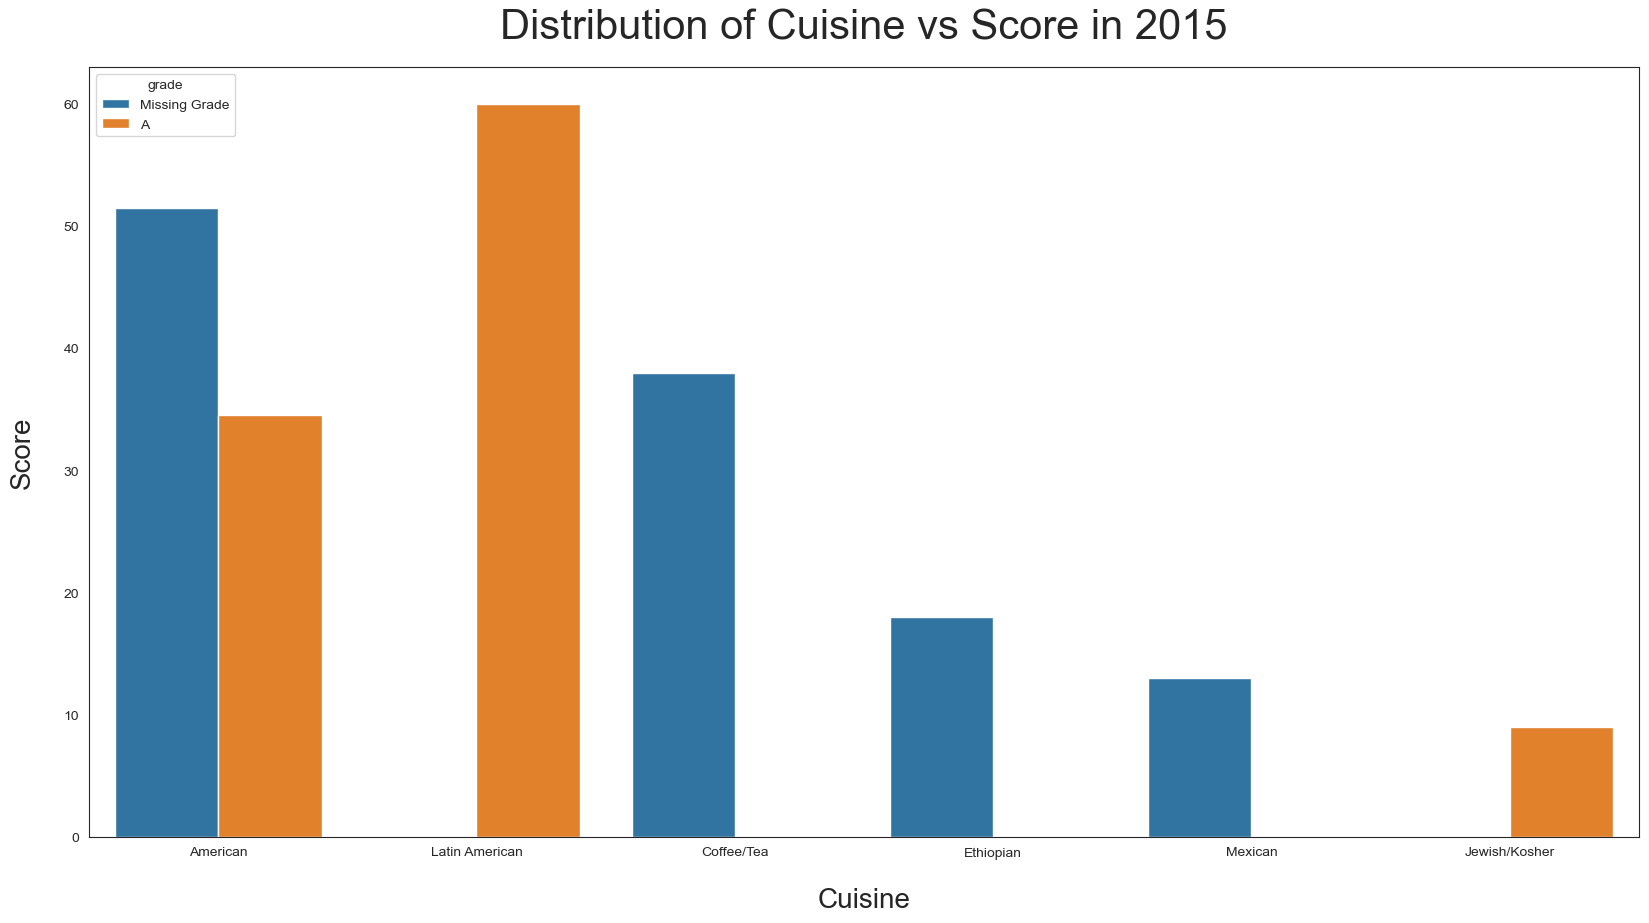

In [21]:
sns.set_style("white")
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data=year_df, x="cuisine_description", y="score", hue= 'grade', ci = False)
ax.set_xlabel('Cuisine',ha='center', labelpad = 20, fontsize = 20)
ax.set_ylabel('Score',ha='center', labelpad = 20, fontsize = 20)
#ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Distribution of Cuisine vs Score in 2015',pad = 20, fontsize = 30)
plt.show()

In [22]:
#save map_df to csv file 

map_df.to_csv('map.csv', index = False)

Second SQL Query for analysis 

In [23]:
cuisine_df = pd.read_sql('''SELECT inspection_date, camis, cuisine_description, sum(score) as score
                 FROM inspection
                 GROUP BY inspection_date, cuisine_description
                 ORDER BY sum(score) DESC;''', connection)
cuisine_df.head()

,inspection_date,camis,cuisine_description,score
0,2019-08-14 00:00:00.000000,41230004,American,1691.0
1,2018-08-16 00:00:00.000000,41396650,American,1421.0
2,2017-07-25 00:00:00.000000,50061149,American,1408.0
3,2019-05-30 00:00:00.000000,41319107,American,1115.0
4,2020-01-23 00:00:00.000000,50036029,American,1067.0


In [24]:
cuisine_df['inspection_date'] = pd.to_datetime(cuisine_df['inspection_date'])
cuisine_df['inspection_date'] = cuisine_df['inspection_date'].dt.year

In [25]:
cuisine_df.head()

,inspection_date,camis,cuisine_description,score
0,2019,41230004,American,1691.0
1,2018,41396650,American,1421.0
2,2017,50061149,American,1408.0
3,2019,41319107,American,1115.0
4,2020,50036029,American,1067.0


In [26]:
cuisine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24392 entries, 0 to 24391
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   inspection_date      24392 non-null  int64  
 1   camis                24392 non-null  int64  
 2   cuisine_description  24392 non-null  object 
 3   score                24392 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 762.4+ KB


In [27]:
cuisine_df.shape

(24392, 4)

In [28]:
#save as csv file 
#save as csv file 

cuisine_df.to_csv('cuisine.csv', index = False)

In [29]:
#read csv file
cuisine_df = pd.read_csv('cuisine.csv')

In [30]:
cuisine_df_new = (cuisine_df.groupby(['inspection_date','cuisine_description'])['score']
                    .sum().reset_index().sort_values('score', ascending = False))
cuisine_df_new = cuisine_df_new[['inspection_date', 'cuisine_description', 'score']]


In [31]:
cuisine_df_new

,inspection_date,cuisine_description,score
206,2019,American,134618.0
455,2022,American,78298.0
221,2019,Chinese,66889.0
131,2018,American,48386.0
267,2019,Pizza,47005.0
...,...,...,...
530,2022,Southwestern,8.0
133,2018,Australian,8.0
312,2020,Czech,8.0
22,2016,Filipino,7.0


In [32]:
#mask year 2019 for EDA 
cuisine_year = cuisine_df_new[cuisine_df_new.inspection_date == 2019]
cuisine_year 

,inspection_date,cuisine_description,score
206,2019,American,134618.0
221,2019,Chinese,66889.0
267,2019,Pizza,47005.0
224,2019,Coffee/Tea,36658.0
254,2019,Latin American,33360.0
...,...,...,...
237,2019,Fruits/Vegetables,80.0
247,2019,Iranian,69.0
228,2019,Czech,49.0
213,2019,Basque,36.0


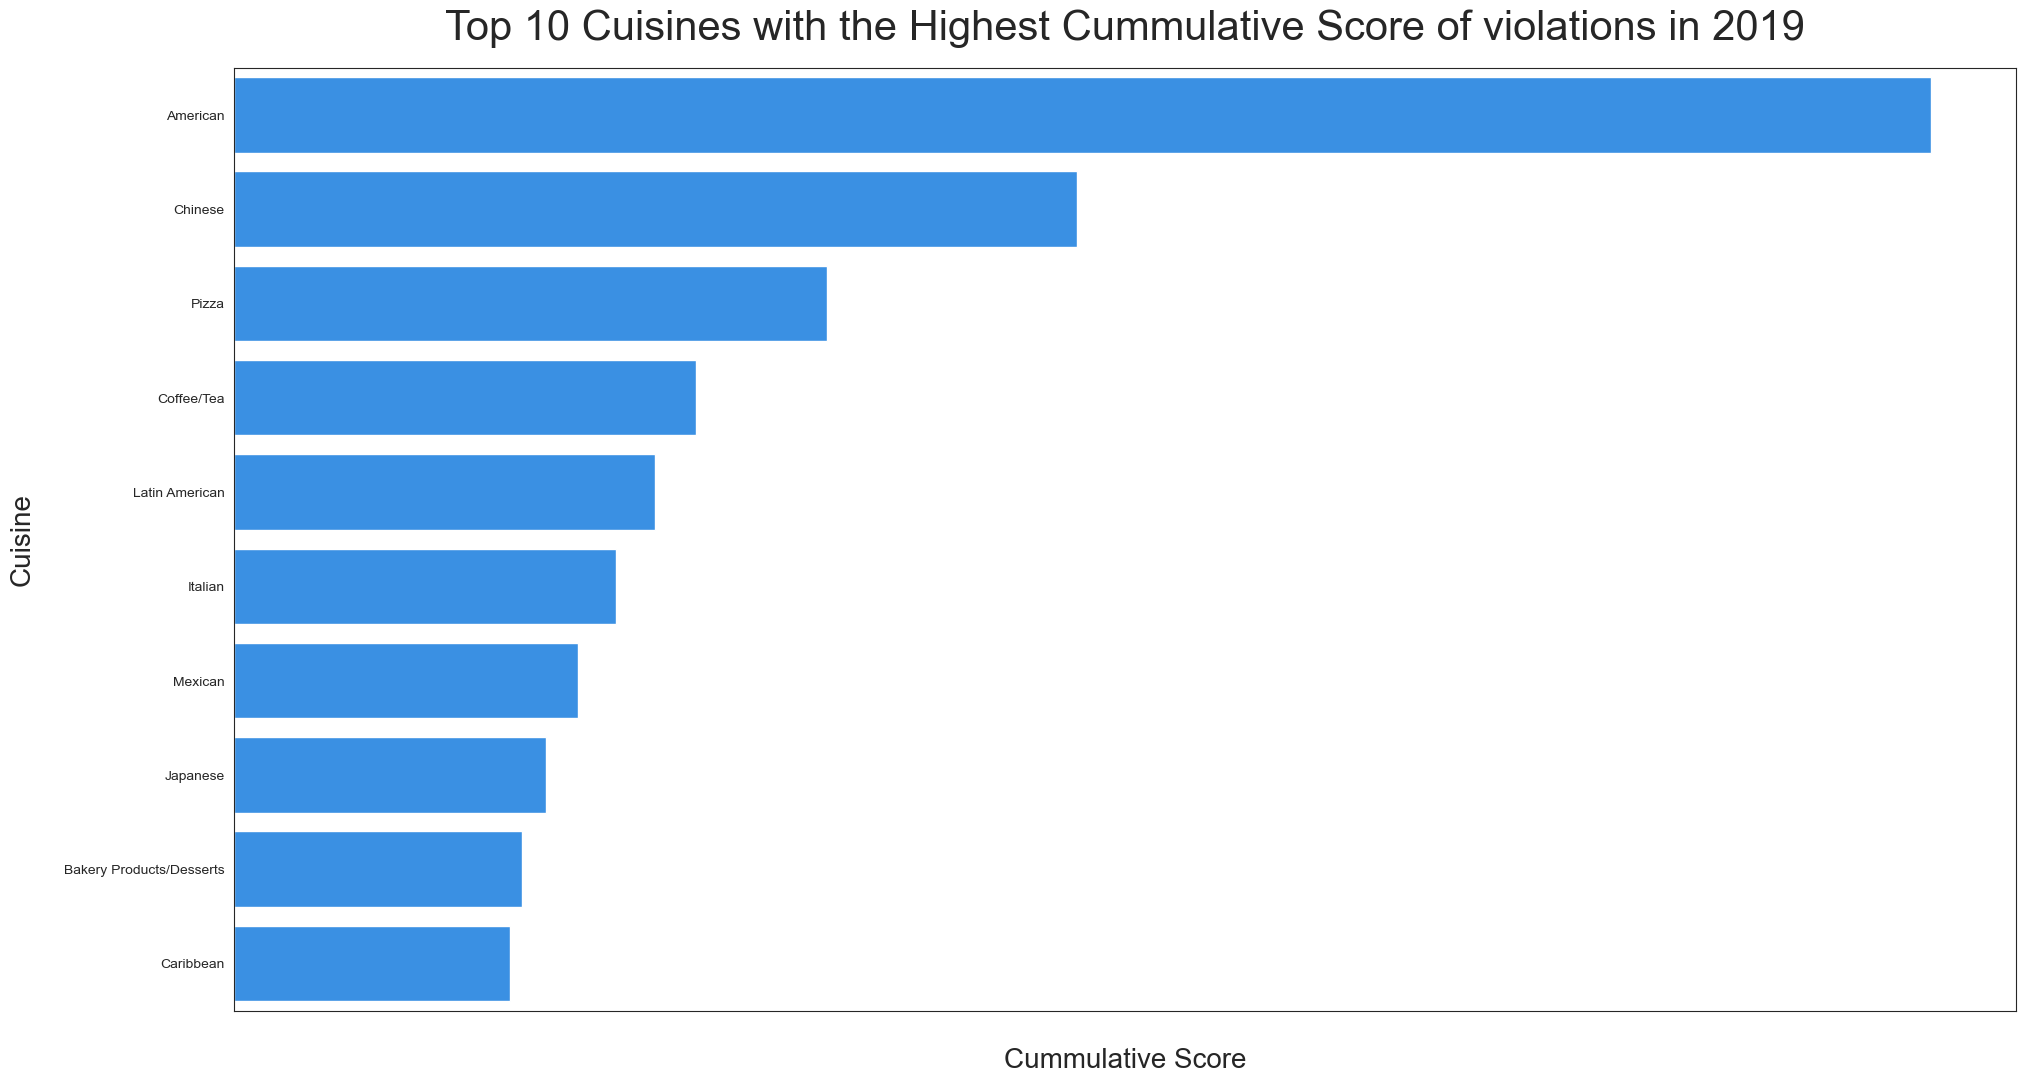

In [33]:
#plot barplot 
sns.set_style("white")
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data=cuisine_year[:10], x='score', y='cuisine_description', ax=ax, color = 'dodgerblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.tight_layout()
ax.tick_params(axis='x', rotation=35)
ax.set_xlabel('Cummulative Score',ha='center', labelpad = 20, fontsize = 20)
ax.set_ylabel('Cuisine',ha='center', labelpad = 20, fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Top 10 Cuisines with the Highest Cummulative Score of violations in 2019',pad = 20, fontsize = 30)
plt.show()

In [34]:
cuisine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24392 entries, 0 to 24391
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   inspection_date      24392 non-null  int64  
 1   camis                24392 non-null  int64  
 2   cuisine_description  24392 non-null  object 
 3   score                24392 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 762.4+ KB
